In [1]:
import pandas as pd
import numpy as np

In [19]:
#df_red = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv', sep=";")
#df_white = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv', sep=";")

If your internet connection is slow, you can directly read from the local files. Uncomment (remove #) before you execute.

In [2]:
df_red = pd.read_csv('winequality-red.csv', sep=";")
df_white = pd.read_csv('winequality-red.csv', sep=";")

In [21]:
df_red.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [22]:
df_red.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
fixed acidity,1599.0,8.319637,1.741096,4.60000,7.1000,7.90000,9.200000,15.90000
volatile acidity,1599.0,0.527821,0.179060,0.12000,0.3900,0.52000,0.640000,1.58000
citric acid,1599.0,0.270976,0.194801,0.00000,0.0900,0.26000,0.420000,1.00000
residual sugar,1599.0,2.538806,1.409928,0.90000,1.9000,2.20000,2.600000,15.50000
chlorides,1599.0,0.087467,0.047065,0.01200,0.0700,0.07900,0.090000,0.61100
free sulfur dioxide,1599.0,15.874922,10.460157,1.00000,7.0000,14.00000,21.000000,72.00000
total sulfur dioxide,1599.0,46.467792,32.895324,6.00000,22.0000,38.00000,62.000000,289.00000
density,1599.0,0.996747,0.001887,0.99007,0.9956,0.99675,0.997835,1.00369
pH,1599.0,3.311113,0.154386,2.74000,3.2100,3.31000,3.400000,4.01000
sulphates,1599.0,0.658149,0.169507,0.33000,0.5500,0.62000,0.730000,2.00000


Assing input (X) and output (y)

In [23]:
y = (df_red['quality'].values > 6)
X = df_red.iloc[:,0:-1]

Split training set and test set

In [24]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = \
    train_test_split(X, y, test_size=0.3, random_state=0)

Normalize X data (on training set)

In [25]:
from sklearn.preprocessing import StandardScaler

stdsc = StandardScaler()
X_train_std = stdsc.fit_transform(X_train)
X_test_std = stdsc.transform(X_test)
pd.DataFrame(X_train_std).describe().transpose()

,count,mean,std,min,25%,50%,75%,max
0,1119.0,-1.271945e-16,1.000447,-2.090941,-0.712549,-0.253085,0.550977,4.341555
1,1119.0,-1.214399e-16,1.000447,-2.214153,-0.757544,-0.056214,0.591167,5.662322
2,1119.0,-2.622765e-16,1.000447,-1.396757,-0.934734,-0.062025,0.759348,3.736827
3,1119.0,2.115277e-16,1.000447,-1.108115,-0.438669,-0.237836,0.029943,8.665794
4,1119.0,-1.587450e-18,1.000447,-1.527181,-0.356857,-0.175255,0.046703,10.559442
5,1119.0,1.438627e-16,1.000447,-1.419711,-0.767974,-0.209341,0.535501,5.190770
6,1119.0,1.230274e-17,1.000447,-1.210217,-0.743039,-0.275861,0.454105,7.052999
7,1119.0,-5.975193e-14,1.000447,-3.520329,-0.608117,-0.018302,0.582045,3.652243
8,1119.0,1.005551e-15,1.000447,-3.669365,-0.638236,0.006686,0.587115,4.521134
9,1119.0,-3.551920e-17,1.000447,-1.626274,-0.618757,-0.226944,0.388761,7.497358


Instead we can use the pipeline method introduced in  [Ch 5 of PML](https://github.com/PHBS/python-machine-learning-book/blob/master/code/ch06/ch06.ipynb). We sequentially apply normilization, PCA (first 2 components) and logistic regression and get about 89% accuracy!

In [27]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

pipe_lr = Pipeline([('scl', StandardScaler()),
                    ('pca', PCA(n_components=2)),
                    ('clf', LogisticRegression(random_state=1))])

pipe_lr.fit(X_train, y_train)
print('Test Accuracy: %.3f' % pipe_lr.score(X_test, y_test))
y_pred = pipe_lr.predict(X_test)

Test Accuracy: 0.892


We replaced LogisticRegression with Support Vector Machine with RBF kernel. The accuracy is similarly 89%.

In [5]:
# -*- coding: utf-8 -*-
"""
Created on Sat Mar 18 21:12:16 2017

@author: Tianhang
"""

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns  
from matplotlib.colors import ListedColormap
from sklearn import svm
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
import statsmodels.api as sm
from sklearn.metrics import accuracy_score, confusion_matrix

df_red = pd.read_csv(\
r'C:\Users\Tianhang\Documents\GitHub\my\winequality-red.csv', sep=";")
df_white = pd.read_csv(\
r'C:\Users\Tianhang\Documents\GitHub\my\winequality-red.csv', sep=";")

y = (df_red['quality'].values > 6)
X = df_red.iloc[:,0:-1]
Y = df_red['quality']




In [7]:
#linear Regression & data visualization
X_train, X_test, y_train, y_test = \
    train_test_split(X, y, test_size=0.3, random_state=0)
Y_train, Y_test = Y[X_train.index], Y[X_test.index]
    
stdsc = StandardScaler()
X_train_std = stdsc.fit_transform(X_train)
X_test_std = stdsc.transform(X_test)
pd.DataFrame(X_train_std).describe().transpose()
X_std = stdsc.transform(X)

X_ols = sm.add_constant(X_train_std)

model = sm.OLS(Y_train,X_ols)
results = model.fit()
print(results.summary())



                            OLS Regression Results                            
Dep. Variable:                quality   R-squared:                       0.371
Model:                            OLS   Adj. R-squared:                  0.365
Method:                 Least Squares   F-statistic:                     59.35
Date:                Mon, 20 Mar 2017   Prob (F-statistic):          1.86e-103
Time:                        22:38:58   Log-Likelihood:                -1110.6
No. Observations:                1119   AIC:                             2245.
Df Residuals:                    1107   BIC:                             2305.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const          5.6515      0.020    288.043      0.0

Test Accuracy: 0.829


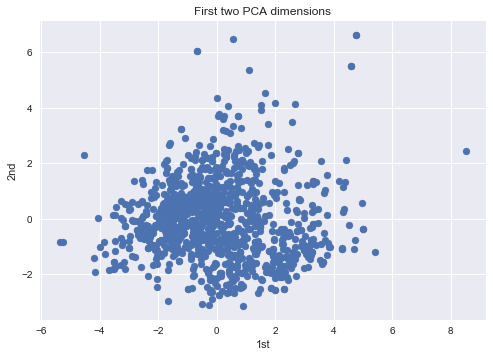

[ 0.28244425  0.18256886]


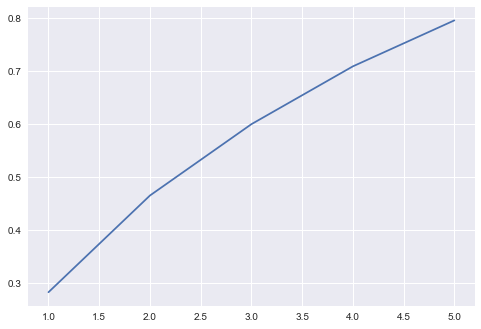

In [10]:
#linear2
pipe_lr = Pipeline([('scl', StandardScaler()),
                    ('pca', PCA(n_components=2)),
                    ('linear',LinearRegression())])

pipe_lr.fit(X_train, Y_train)
Y_pred = pipe_lr.predict(X_test)
y_pred = (Y_pred > 6)
print('Test Accuracy: %.3f' % accuracy_score(y_test,y_pred))




#plot the first two PCA dimensions
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_std)
X_test_pca = pca.transform(X_test_std)
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1])
plt.title('First two PCA dimensions')
plt.xlabel('1st')
plt.ylabel('2nd')
plt.show()
print(pca.explained_variance_ratio_)

#know better about PCA
pca2 = PCA(n_components=5)
pca2.fit(X_train_std)
pcar = [sum(pca2.explained_variance_ratio_[:i]) for i in range(1,6)]
plt.plot(list(range(1,6)),pcar)
plt.show()
   








Regression Method: clf 
Test Accuracy: 0.892


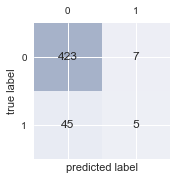

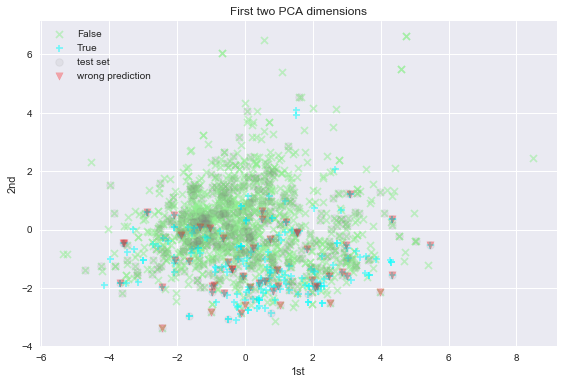

Regression Method: svm.rbf 
Test Accuracy: 0.883


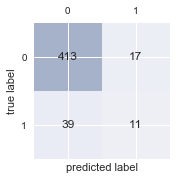

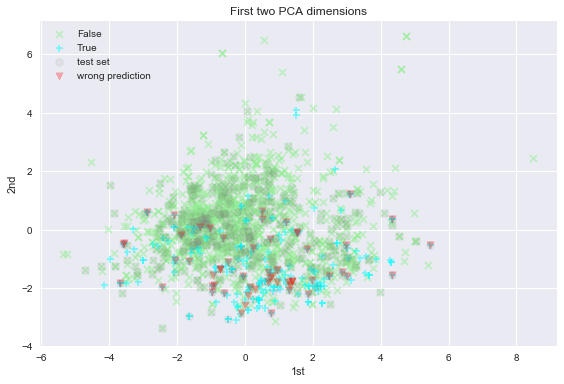

Regression Method: svm.linear 
Test Accuracy: 0.896


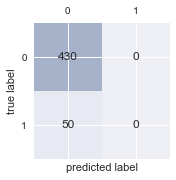

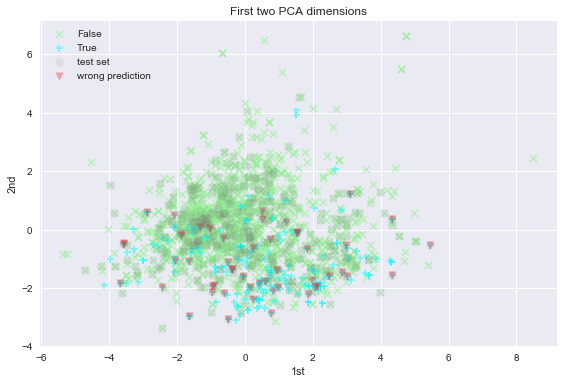

In [14]:
#regression using pipeline & try to visualize the result on the 2-dimensional plane

regression = [
              ('clf', LogisticRegression(random_state=1)),\
              ('svm.rbf', svm.SVC(kernel='rbf', gamma=10)),\
              ('svm.linear',svm.SVC(kernel='linear', gamma=10))\
             # ('svm.poly',svm.SVC(kernel='poly',gamma=10))
              ]

pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_std)
X_test_pca = pca.transform(X_test_std)
X_pca = pca.transform(X_std)


for i in range(len(regression)):
    pipe_cl = Pipeline([('scl', StandardScaler()),
                    ('pca', PCA(n_components=2)),
                    regression[i]])

    pipe_cl.fit(X_train, y_train)
    print('Regression Method: %s ' % regression[i][0])
    print('Test Accuracy: %.3f' % pipe_cl.score(X_test, y_test))
    y_pred = pipe_cl.predict(X_test)
    
    confmat = confusion_matrix(y_true=y_test, y_pred=y_pred)
    fig, ax = plt.subplots(figsize=(2.5, 2.5))
    ax.matshow(confmat, cmap=plt.cm.Blues, alpha=0.3)
    for i in range(confmat.shape[0]):
        for j in range(confmat.shape[1]):
            ax.text(x=j, y=i, s=confmat[i, j], va='center', ha='center')
    
    plt.xlabel('predicted label')
    plt.ylabel('true label')
    wrong_y = (y_test!=y_pred)
    
    fig = plt.figure()      
    markers = ('x',  '+')
    colors = ('lightgreen',  'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
      
    for idx, cl in enumerate(np.unique(y)):
        
        plt.scatter(x=X_pca[y == cl, 0], y=X_pca[y == cl, 1],
                alpha=0.5, c=cmap(idx),
                marker=markers[idx], label=cl)
    
    plt.scatter(X_test_pca[:, 0],
            X_test_pca[:, 1],
            c='gray',
            alpha=0.1,
            linewidths=1,
            marker='o',
            s=55, label='test set')
    
    plt.scatter(x=X_test_pca[wrong_y==True,0],\
                y=X_test_pca[wrong_y==True,1],\
                c='red',
                alpha=0.3,
                marker='v',
                s=55, label='wrong prediction')
    

    plt.title('First two PCA dimensions')
    plt.xlabel('1st')
    plt.ylabel('2nd')
    plt.legend(loc='upper left')
    
    plt.tight_layout()
    plt.show()

